In [2]:
!pip install xgboost

    100% |████████████████████████████████| 686kB 6.5MB/s ta 0:00:011
  Stored in directory: /Users/ptw/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost


In [101]:
!pip install merf

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, XGBRFClassifier

#### Import data

In [213]:
# housevotes_df = pd.read_csv('../../data/02_intermediate/HouseVotesFeatures_12_18_0814PM.csv')
housevotes_df = pd.read_csv('../../data/04_models/ACS_HouseVotes_L1_14_18_0815.csv')

In [214]:
housevotes_df.shape

(1305, 278)

In [215]:
housevotes_df.shape

(1305, 278)

In [216]:
list(housevotes_df.columns)

['yr_district_id',
 'year_x',
 'state',
 'district_id_x',
 'winner_voteshare',
 'total_dem_vote_share',
 'total_rep_vote_share',
 'dL1_winner',
 'dL2_winner',
 'dL3_winner',
 'dL4_winner',
 'dL5_winner',
 'incumbent_L5_races',
 'incumbent_L4_races',
 'incumbent_L3_races',
 'incumbent_L2_races',
 'rep_L1_wins',
 'rep_L5_wins',
 'rep_L4_wins',
 'rep_L3_wins',
 'rep_L2_wins',
 'dem_L1_wins',
 'dem_L5_wins',
 'dem_L4_wins',
 'dem_L3_wins',
 'dem_L2_wins',
 'rep_L1_voteshare',
 'rep_L5_voteshare',
 'rep_L4_voteshare',
 'rep_L3_voteshare',
 'rep_L2_voteshare',
 'dem_L1_voteshare',
 'dem_L5_voteshare',
 'dem_L4_voteshare',
 'dem_L3_voteshare',
 'dem_L2_voteshare',
 'target',
 'dem_incumbent_in_race',
 'rep_incumbent_in_race',
 'flipped',
 'dmargin_45_55',
 'mpop_share',
 'fpop_share',
 'm18_below_share',
 'f18_below_share',
 '18_below_share',
 'm18_above_share',
 'f18_above_share',
 '18_above_share',
 'm18_29_share',
 'f18_29_share',
 '18_29_share',
 'm30_44_share',
 'f30_44_share',
 '30_44_s

## Visualizations for EDA

In [217]:
housevotes_df.flipped.value_counts()

0    1219
1      86
Name: flipped, dtype: int64

### Assign IDs to each district

In [218]:
district_id_mapping = dict(zip(housevotes_df.district_id_x.unique(), np.arange(1, 436)))

In [219]:
housevotes_df['idx'] = housevotes_df.district_id_x.map(district_id_mapping)

In [220]:
housevotes_df['2014'] = 0
housevotes_df.loc[housevotes_df['year_x']==2014, '2014'] = 1

In [221]:
housevotes_df['2016'] = 0
housevotes_df.loc[housevotes_df['year_x']==2016, '2016'] = 1

In [222]:
housevotes_df['2018'] = 0
housevotes_df.loc[housevotes_df['year_x']==2018, '2018'] = 1

In [223]:
housevotes_df.head(1000)

,yr_district_id,year_x,state,district_id_x,winner_voteshare,total_dem_vote_share,total_rep_vote_share,dL1_winner,dL2_winner,dL3_winner,...,L1_income_top_5_percent_scaled,diff1_income_top_5_percent_scaled,L1_median_gross_rent_scaled,diff1_median_gross_rent_scaled,L1_median_monthly_owner_costs_scaled,diff1_median_monthly_owner_costs_scaled,idx,2014,2016,2018
0,2014-AK-00,2014,Alaska,AK-00,0.509657,0.409672,0.585763,1,1,1,...,0.111978,-0.092078,0.876998,-0.141715,0.356498,-0.014218,1,1,0,0
1,2016-AK-00,2016,Alaska,AK-00,0.503209,0.360220,0.606292,1,1,1,...,0.023688,0.323404,0.829523,-0.205865,0.435842,-0.059753,1,0,1,0
2,2018-AK-00,2018,Alaska,AK-00,0.530819,0.464971,0.530819,1,1,1,...,-0.198030,0.061056,0.640565,-0.171456,0.353170,-0.024959,1,0,0,1
3,2014-AL-01,2014,Alabama,AL-01,0.681569,0.317130,0.681569,0,0,0,...,-0.718340,0.007191,-0.613210,-0.051314,-0.900646,-0.041630,2,1,0,0
4,2016-AL-01,2016,Alabama,AL-01,0.963825,0.000000,0.963825,1,0,0,...,-0.716424,0.192309,-0.599062,-0.084289,-0.841109,-0.095664,2,0,1,0
5,2018-AL-01,2018,Alabama,AL-01,0.631563,0.367765,0.631563,1,1,0,...,-0.697448,0.108855,-0.686589,-0.027177,-0.880409,-0.024897,2,0,0,1
6,2014-AL-02,2014,Alabama,AL-02,0.673425,0.325641,0.673425,1,1,0,...,-0.805814,-0.075982,-0.829596,-0.098375,-1.143065,0.004196,3,1,0,0
7,2016-AL-02,2016,Alabama,AL-02,0.487685,0.405262,0.487685,1,1,1,...,-0.891080,0.279145,-0.906526,-0.051796,-1.104076,-0.006874,3,0,1,0
8,2018-AL-02,2018,Alabama,AL-02,0.613884,0.384259,0.613884,1,1,1,...,-0.746709,-0.005034,-0.885662,-0.011760,-1.078625,0.017593,3,0,0,1
9,2014-AL-03,2014,Alabama,AL-03,0.661205,0.337224,0.661205,1,1,1,...,-0.772982,0.115409,-0.956162,-0.121227,-1.113031,0.021076,4,1,0,0


### Define a custom train-test-split function

In [489]:
def district_train_test_split(dataframe, idx_colname, np_seed, tts_seed, test_size, cols_for_stratify):
    """
    Split a dataframe containing numeric IDs for each congressional district
    into train and test sets, such that there is no leakage of districts between
    the train and test sets.
    
    Parameters
    ----------
    
        dataframe : a dataframe with a column for district-level numeric ID
        idx_colname : the name of the column containing the district numberic ID (string)
        np_seed : the random seed for Numpy, for splitting the districts into 2 samples
        tts_seed : the random state seed to be passed into train_test_split()
        test_size : the test size to be passed into train_test_split()
        cols_for_stratify : list of column names to pass to the stratify parameter
        
    Returns
    -------
        X_train, X_test, y_train, y_test (also prints a report on their shapes)
        
    """
    np.random.seed(np_seed)
    population = np.arange(1, 436)
    sample_1_ids = np.random.choice(population, 200, replace=False)
    sample_2_ids = list(set(population) - set(sample_1_ids))
    sample_1 = dataframe[dataframe[idx_colname].isin(sample_1_ids)]
    sample_2 = dataframe[dataframe[idx_colname].isin(sample_2_ids)]
    train_s1, test_s1 = train_test_split(sample_1, 
                                         test_size=test_size, 
                                         random_state=tts_seed, 
                                         stratify=sample_1[cols_for_stratify]
                                        )
    train_s2, test_s2 = train_test_split(sample_2,
                                         test_size=test_size,
                                         random_state=tts_seed, 
                                         stratify=sample_2[cols_for_stratify]
                                        )
    train = pd.concat([train_s1, train_s2], axis=0)
    test = pd.concat([test_s1, test_s2], axis=0)
#     X_train = train.drop(['target', 'idx'], axis=True)
#     y_train = train['target']
#     X_test = test.drop(['target', 'idx'], axis=True)
#     y_test = test['target']

#     print('Shape for X_train:', X_train.shape)
#     print('Shape for y_train:', y_train.shape)
#     print('Shape for X_test:', X_test.shape)
#     print('Shape for y_test:', y_test.shape)
    
    return X_train, X_test, y_train, y_test

Old tests to try on our custom TTS function

In [32]:
# set(train_s1.idx.unique()) == set(train_s2.idx.unique())

In [33]:
# test_set = set(list(set(train.idx.unique())) + [1000, 2000])

In [34]:
# set(train.idx.unique()) - set(train_s1.idx.unique()) - set(train_s2.idx.unique())  # looks good

In [35]:
# test_set - set(train_s1.idx.unique()) - set(train_s2.idx.unique())  # looks good

In [28]:
housevotes_df.columns

Index(['yr_district_id', 'year_x', 'state', 'district_id_x',
       'winner_voteshare', 'total_dem_vote_share', 'total_rep_vote_share',
       'dL1_winner', 'dL2_winner', 'dL3_winner',
       ...
       'diff1_income_fourth_quintile_scaled',
       'L1_income_highest_quintile_scaled',
       'diff1_income_highest_quintile_scaled',
       'L1_income_top_5_percent_scaled', 'diff1_income_top_5_percent_scaled',
       'L1_median_gross_rent_scaled', 'diff1_median_gross_rent_scaled',
       'L1_median_monthly_owner_costs_scaled',
       'diff1_median_monthly_owner_costs_scaled', 'idx'],
      dtype='object', length=279)

## Different strategies for train test split

A. Split train/test by year (*)
 - As long as there is no variable (explicit or implicit) in the training set that tracks with the district, we should be okay splitting train/test on year
 

B. Split train test by district level (so that a districts either appears in train or test but not both)


#### Strategy A: Train test split by year

Using 2014 and 2016 as the training data, and 2018 as the test data

Filtering features using `features_model_1`

In [79]:
train = housevotes_df[housevotes_df.year_x.isin([2014, 2016])]
train.shape

(870, 282)

In [80]:
test = housevotes_df[housevotes_df.year_x.isin([2018])]
test.shape

(435, 282)

In [81]:
X_train = train.drop(['target', 'idx'], axis=1)
y_train = train['target']
print(X_train.shape)
print(y_train.shape)

(870, 280)
(870,)


In [82]:
X_test = test.drop(['target', 'idx'], axis=1)
y_test = test['target']
print(X_test.shape)
print(y_test.shape)

(435, 280)
(435,)


In [90]:
list(housevotes_df.columns)

['yr_district_id',
 'year_x',
 'state',
 'district_id_x',
 'winner_voteshare',
 'total_dem_vote_share',
 'total_rep_vote_share',
 'dL1_winner',
 'dL2_winner',
 'dL3_winner',
 'dL4_winner',
 'dL5_winner',
 'incumbent_L5_races',
 'incumbent_L4_races',
 'incumbent_L3_races',
 'incumbent_L2_races',
 'rep_L1_wins',
 'rep_L5_wins',
 'rep_L4_wins',
 'rep_L3_wins',
 'rep_L2_wins',
 'dem_L1_wins',
 'dem_L5_wins',
 'dem_L4_wins',
 'dem_L3_wins',
 'dem_L2_wins',
 'rep_L1_voteshare',
 'rep_L5_voteshare',
 'rep_L4_voteshare',
 'rep_L3_voteshare',
 'rep_L2_voteshare',
 'dem_L1_voteshare',
 'dem_L5_voteshare',
 'dem_L4_voteshare',
 'dem_L3_voteshare',
 'dem_L2_voteshare',
 'target',
 'dem_incumbent_in_race',
 'rep_incumbent_in_race',
 'flipped',
 'dmargin_45_55',
 'mpop_share',
 'fpop_share',
 'm18_below_share',
 'f18_below_share',
 '18_below_share',
 'm18_above_share',
 'f18_above_share',
 '18_above_share',
 'm18_29_share',
 'f18_29_share',
 '18_29_share',
 'm30_44_share',
 'f30_44_share',
 '30_44_s

#### Strategy B: Train test split by district

Filtering features using `features_model_1`

In [289]:
X_train, X_test, y_train, y_test = district_train_test_split(dataframe=housevotes_df, 
                                                             idx_colname='idx',
                                                             np_seed=1, 
                                                             tts_seed=1, 
                                                             test_size=0.2,
                                                             cols_for_stratify=['target', 'flipped']
                                                             )

Shape for X_train: (1044, 281)
Shape for y_train: (1044,)
Shape for X_test: (261, 281)
Shape for y_test: (261,)


In [290]:
X_train.district_id_x.nunique()

433

## Modeling

**Null accuracy**: "accuracy that could be achieved by always predicting the most frequent class"

In [291]:
max(y_test.mean(), 1 - y_test.mean())

0.5210727969348659

## Model 1: Baseline model - Just vote history

Use `dem_L1_wins` as the sole feature


In [681]:
#features_baseline_model = ['dem_L1_wins']
features_baseline_model = ['dem_L1_wins']

#### Random Forest, for baseline model

In [682]:
X_train, X_test, y_train, y_test = district_train_test_split(dataframe=housevotes_df, 
                                                             idx_colname='idx',
                                                             np_seed=12345, 
                                                             tts_seed=12345, 
                                                             test_size=0.2,
                                                             cols_for_stratify=['target', 'dmargin_45_55']
                                                             )

In [683]:
X_train = X_train[features_baseline_model]
X_test = X_test[features_baseline_model]
print(X_train.shape)
print(X_test.shape)

rf = RandomForestClassifier(random_state=23, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_class = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))

(1044, 1)
(261, 1)
Test Accuracy score:  0.9578544061302682
Test F1 score:  0.9551020408163265


In [684]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[133,   4],
       [  7, 117]])

In [685]:
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_class), columns = ['Predicted R wins', 'Predicted D wins'], 
             index = ['Actual R wins', 'Actual D wins'])

,Predicted R wins,Predicted D wins
Actual R wins,133,4
Actual D wins,7,117


Look at feature importance

In [686]:
feat_importance = pd.DataFrame((zip(X_train.columns, rf.feature_importances_)))
feat_importance.columns = ['feature_name', 'importance']
feat_importance.importance = feat_importance.importance.apply(lambda x: '%.3f' % x) 
feat_importance.sort_values('importance', ascending=False)

,feature_name,importance
0,dem_L1_wins,1.000


## Logistic regression

In [687]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))
metrics.confusion_matrix(y_test, y_pred_class)


Test Accuracy score:  0.9578544061302682
Test F1 score:  0.9551020408163265


/Users/ptw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[133,   4],
       [  7, 117]])

## KNN

In [688]:
scores = []
for k in range(1, 36):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
#     print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
#     print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))
    scores.append(metrics.accuracy_score(y_test, y_pred_class))

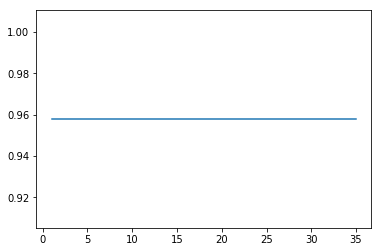

In [689]:
plt.plot(range(1, 36), scores)  

In [690]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))
metrics.confusion_matrix(y_test, y_pred_class)

Test Accuracy score:  0.9578544061302682
Test F1 score:  0.9551020408163265


array([[133,   4],
       [  7, 117]])

## AdaBoost

In [700]:
ada_class = AdaBoostClassifier(random_state = 12345)
ada_class.fit(X_train, y_train)
print(ada_class.score(X_train, y_train))
print(ada_class.score(X_test, y_test))

0.9846743295019157
0.946360153256705


## XGBoost

In [692]:
xgb_class = XGBClassifier(random_state = 12345)
xgb_rf_class = XGBRFClassifier(random_state = 12345)
xgb_class.fit(X_train, y_train)
print(xgb_class.score(X_train, y_train))
print(xgb_class.score(X_test, y_test))

xgb_rf_class.fit(X_train, y_train)
print(xgb_rf_class.score(X_train, y_train))
print(xgb_rf_class.score(X_test, y_test))

0.9281609195402298
0.9578544061302682
0.9281609195402298
0.9578544061302682


In [353]:
def avgFeatImp(imp_arr, feat_arr):
    arrLen = imp_arr.shape[1]
    avg_list = []
    for i in range(arrLen):
        avg_list.append(np.mean(imp_arr[:, i]))
    avg_feat_importance = pd.DataFrame((zip(feat_arr, avg_list)))
    avg_feat_importance.columns = ['feat', "avg_imp"]
    return avg_feat_importance


def plotFeature_i(i, importance_Arr, features_Arr):
    feat = features_Arr[i]
    fig = plt.figure()
    plt.hist(importance_Arr[:, i], label=feat)
    plt.legend


def results(model,nloop):
    model_list = []
    acc_list = []
    f1_list = []
    y_pred_list = []
    y_prob_list = []
    importanceDF_list = []
    importance_list = []
    for loop_id in range(nloop):
        X_train, X_test, y_train, y_test = district_train_test_split(dataframe=housevotes_df,
                                                                 idx_colname='idx',
                                                                 np_seed=loop_id,
                                                                 tts_seed=loop_id+1,
                                                                 test_size=0.2,
                                                                 cols_for_stratify=[
                                                                     'target', 'flipped']
                                                                 )
        X_train = X_train[model]
        X_test = X_test[model]
        rf = RandomForestClassifier(random_state=loop_id*2, n_estimators=100)

        rf.fit(X_train, y_train)
        feat_importance = pd.DataFrame(
            (zip(X_train.columns, rf.feature_importances_)))
        feat_importance.columns = ['feat', "imp"]

        y_pred_class = rf.predict(X_test)
        y_pred_prob = rf.predict_proba(X_test)

#         print('Test Accuracy score: ',
#               metrics.accuracy_score(y_test, y_pred_class))
#         print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))
        model_list.append(rf)
        acc_list.append(metrics.accuracy_score(y_test, y_pred_class))
        f1_list.append(metrics.f1_score(y_test, y_pred_class))
        importanceDF_list.append(feat_importance)
        importance_list.append(feat_importance.sort_values(by='feat').imp.values)

    features_Arr = feat_importance.sort_values(by='feat').feat.values
    importance_Arr = np.array(importance_list)
    accscore = sum(acc_list) / len(acc_list)
    print(f'Avg Accuracy score: {accscore}')
    f1score = sum(f1_list) / len(f1_list)
    print(f'Avg F1 score: {f1score}')
    avg_feat_imp = avgFeatImp(importance_Arr, features_Arr)
    feat_imp_table = avg_feat_imp.sort_values(by='avg_imp', ascending=False)
    print(feat_imp_table)
    for i in range(len(features_Arr)):
        plotFeature_i(i, importance_Arr, features_Arr)
    return accscore,f1score,feat_imp_table

Avg Accuracy score: 0.9325670498084293
Avg F1 score: 0.926908199307294
          feat   avg_imp
0  dem_L1_wins  0.515968
1  dem_L2_wins  0.484032


(0.9325670498084293, 0.926908199307294,           feat   avg_imp
 0  dem_L1_wins  0.515968
 1  dem_L2_wins  0.484032)

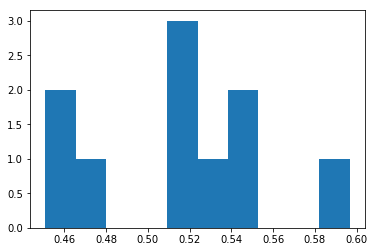

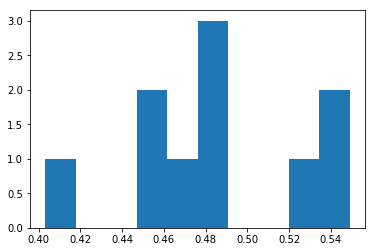

In [354]:
results(features_baseline_model, 10)

In [325]:
print(f'Avg Accuracy score: {sum(acc_list) / len(acc_list)}')
print(f'Avg F1 score: {sum(f1_list) / len(f1_list)}')

Avg Accuracy score: 0.9337931034482767
Avg F1 score: 0.9282199094676451


          feat   avg_imp
0  dem_L1_wins  0.531087
1  dem_L2_wins  0.468913


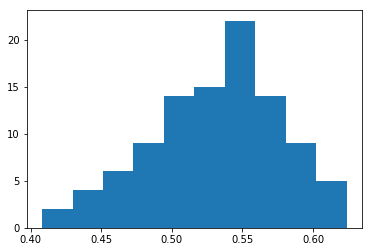

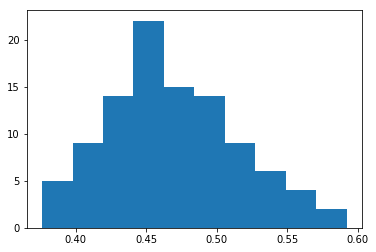

In [330]:
def avgFeatImp(imp_arr, feat_arr):
    arrLen = imp_arr.shape[1]
    avg_list = []
    for i in range(arrLen):
        avg_list.append(np.mean(imp_arr[:, i]))
    avg_feat_importance = pd.DataFrame((zip(feat_arr, avg_list)))
    avg_feat_importance.columns = ['feat', "avg_imp"]
    return avg_feat_importance

avg_feat_imp = avgFeatImp(importance_Arr, features_Arr)
print(avg_feat_imp.sort_values(by='avg_imp', ascending=False))

def plotFeature_i(i, importance_Arr, features_Arr):
    feat = features_Arr[i]
    fig = plt.figure()
    plt.hist(importance_Arr[:,i], label=feat)
    plt.legend

for i in range(len(features_Arr)):
    plotFeature_i(i, importance_Arr, features_Arr)

#### Random Forest, for baseline model

In [429]:
# features_baseline_model = ['dem_L1_wins']
features_baseline_model = ['dem_L1_wins','dem_L2_wins','2014','2016','2018']

In [435]:
X_train, X_test, y_train, y_test = district_train_test_split(dataframe=housevotes_df, 
                                                             idx_colname='idx',
                                                             np_seed=12345, 
                                                             tts_seed=12345, 
                                                             test_size=0.2,
                                                             cols_for_stratify=['target', 'dmargin_45_55']
                                                             )

In [436]:
X_train = X_train[features_baseline_model]
X_test = X_test[features_baseline_model]
print(X_train.shape)
print(X_test.shape)

rf = RandomForestClassifier(random_state=23, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_class = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))

(1044, 5)
(261, 5)
Test Accuracy score:  0.9540229885057471
Test F1 score:  0.9508196721311476


In [432]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[133,   4],
       [ 12, 112]])

Look at feature importance

In [433]:
feat_importance = pd.DataFrame((zip(X_train.columns, rf.feature_importances_)))
feat_importance.columns = ['feature_name', 'importance']
feat_importance.importance = feat_importance.importance.apply(lambda x: '%.3f' % x) 
feat_importance.sort_values('importance', ascending=False)

,feature_name,importance
0,dem_L1_wins,0.625
1,dem_L2_wins,0.348
4,2018,0.015
2,2014,0.006
3,2016,0.006


## Logistic regression

In [434]:
X_train = X_train[features_baseline_model]
X_test = X_test[features_baseline_model]
print(X_train.shape)
print(X_test.shape)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))
metrics.confusion_matrix(y_test, y_pred_class)


(1044, 5)
(261, 5)
Test Accuracy score:  0.9386973180076629
Test F1 score:  0.9338842975206612


/Users/ptw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[132,   5],
       [ 11, 113]])

## Model 2: Baseline model - Just demographic data

Use just ACS variables as features


In [666]:
features_acs_only = [
 'mpop_share',
 'fpop_share',
 'm18_below_share',
 'f18_below_share',
 '18_below_share',
 'm18_above_share',
 'f18_above_share',
 '18_above_share',
 'm18_29_share',
 'f18_29_share',
 '18_29_share',
 'm30_44_share',
 'f30_44_share',
 '30_44_share',
 'm45_59_share',
 'f45_59_share',
 '45_59_share',
 'm60_74_share',
 'f60_74_share',
 '60_74_share',
 'm75_above_share',
 'f75_above_share',
 '75_above_share',
 'white_share',
 'black_share',
 'asian_share',
 'hispanic_share',
 'otherrace_share',
 'native_share',
 'nativeinstate_share',
 'nativeoutofstate_share',
 'foreignborn_share',
 'hs_below_share',
 'hs_share',
 'somecollege_share',
 'college_share',
 'graddeg_share',
 'samehouse_share',
 'samecounty_share',
 'samestate_share',
 'diffstate_share',
 'liveabroad_share',
 'ptransport_share',
 'walktowork_share',
 'workathome_share',
 'inschool_share',
 'incollege_share',
 'ingradschool_share',
 'm_college_share',
 'm_graddeg_share',
 'm_phd_share',
 'f_college_share',
 'f_graddeg_share',
 'f_phd_share',
 'poverty_share',
 'hhinc_10k_less_share',
 'hhinc_30k_less_share',
 'hhinc_50k_less_share',
 'hhinc_75k_more_share',
 'hhinc_100k_more_share',
 'hhinc_125k_more_share',
 'hhinc_150k_more_share',
 'hhinc_200k_more_share',
 'veteran_share',
 'lfp_share',
 'unemp_rate',
 'armedforce_share',
 'vacanthousing_share',
 'renter_share',
 'mortgage_share',
 'diff1_mpop_share',
 'diff1_fpop_share',
 'diff1_m18_below_share',
 'diff1_f18_below_share',
 'diff1_18_below_share',
 'diff1_m18_above_share',
 'diff1_f18_above_share',
 'diff1_18_above_share',
 'diff1_m18_29_share',
 'diff1_f18_29_share',
 'diff1_18_29_share',
 'diff1_m30_44_share',
 'diff1_f30_44_share',
 'diff1_30_44_share',
 'diff1_m45_59_share',
 'diff1_f45_59_share',
 'diff1_45_59_share',
 'diff1_m60_74_share',
 'diff1_f60_74_share',
 'diff1_60_74_share',
 'diff1_m75_above_share',
 'diff1_f75_above_share',
 'diff1_75_above_share',
 'diff1_white_share',
 'diff1_black_share',
 'diff1_asian_share',
 'diff1_hispanic_share',
 'diff1_otherrace_share',
 'diff1_native_share',
 'diff1_nativeinstate_share',
 'diff1_nativeoutofstate_share',
 'diff1_foreignborn_share',
 'diff1_hs_below_share',
 'diff1_hs_share',
 'diff1_somecollege_share',
 'diff1_college_share',
 'diff1_graddeg_share',
 'diff1_samehouse_share',
 'diff1_samecounty_share',
 'diff1_samestate_share',
 'diff1_diffstate_share',
 'diff1_liveabroad_share',
 'diff1_ptransport_share',
 'diff1_walktowork_share',
 'diff1_workathome_share',
 'diff1_inschool_share',
 'diff1_incollege_share',
 'diff1_ingradschool_share',
 'diff1_m_college_share',
 'diff1_m_graddeg_share',
 'diff1_m_phd_share',
 'diff1_f_college_share',
 'diff1_f_graddeg_share',
 'diff1_f_phd_share',
 'diff1_poverty_share',
 'diff1_hhinc_10k_less_share',
 'diff1_hhinc_30k_less_share',
 'diff1_hhinc_50k_less_share',
 'diff1_hhinc_75k_more_share',
 'diff1_hhinc_100k_more_share',
 'diff1_hhinc_125k_more_share',
 'diff1_hhinc_150k_more_share',
 'diff1_hhinc_200k_more_share',
 'diff1_veteran_share',
 'diff1_lfp_share',
 'diff1_unemp_rate',
 'diff1_armedforce_share',
 'diff1_vacanthousing_share',
 'diff1_renter_share',
 'diff1_mortgage_share',
 'median_household_income_scaled',
 'income_lowest_quintile_scaled',
 'income_second_quintile_scaled',
 'income_third_quintile_scaled',
 'income_fourth_quintile_scaled',
 'income_highest_quintile_scaled',
 'income_top_5_percent_scaled',
 'median_gross_rent_scaled',
 'median_monthly_owner_costs_scaled',
 'diff1_median_household_income_scaled',
 'diff1_income_lowest_quintile_scaled',
 'diff1_income_second_quintile_scaled',
 'diff1_income_third_quintile_scaled',
 'diff1_income_fourth_quintile_scaled',
 'diff1_income_highest_quintile_scaled',
 'diff1_income_top_5_percent_scaled',
 'diff1_median_gross_rent_scaled',
 'diff1_median_monthly_owner_costs_scaled'
] #

In [667]:
len(features_acs_only)

158

#### Random Forest

In [668]:
X_train, X_test, y_train, y_test = district_train_test_split(dataframe=housevotes_df, 
                                                             idx_colname='idx',
                                                             np_seed=12345, 
                                                             tts_seed=12345, 
                                                             test_size=0.2,
                                                             cols_for_stratify=['target', 'dmargin_45_55']
                                                             )

In [669]:
X_train = X_train[features_acs_only].copy()
X_test = X_test[features_acs_only].copy()
print(X_train.shape)
print(X_test.shape)

rf = RandomForestClassifier(random_state=23, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_class = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))

(1044, 158)
(261, 158)
Test Accuracy score:  0.8659003831417624
Test F1 score:  0.8571428571428572


In [670]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[121,  16],
       [ 19, 105]])

In [671]:
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_class), columns = ['Predicted R wins', 'Predicted D wins'], 
             index = ['Actual R wins', 'Actual D wins'])

,Predicted R wins,Predicted D wins
Actual R wins,121,16
Actual D wins,19,105


Look at feature importance

In [672]:
feat_importance = pd.DataFrame((zip(X_train.columns, rf.feature_importances_)))
feat_importance.columns = ['feature_name', 'importance']
feat_importance.importance = feat_importance.importance.apply(lambda x: '%.3f' % x) 
feat_importance.sort_values('importance', ascending=False)

,feature_name,importance
42,ptransport_share,0.114
23,white_share,0.054
68,renter_share,0.037
31,foreignborn_share,0.029
63,veteran_share,0.028
25,asian_share,0.026
28,native_share,0.024
148,median_monthly_owner_costs_scaled,0.019
147,median_gross_rent_scaled,0.017
39,samestate_share,0.014


## KNN

In [673]:
scores = []
for k in range(1, 36):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
#     print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
#     print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))
    scores.append(metrics.accuracy_score(y_test, y_pred_class))

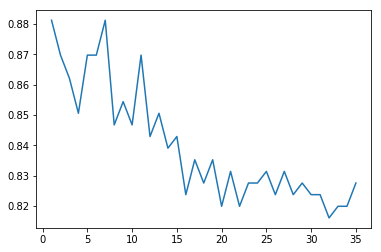

In [674]:
plt.plot(range(1, 36), scores)  

In [675]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))
metrics.confusion_matrix(y_test, y_pred_class)

Test Accuracy score:  0.8812260536398467
Test F1 score:  0.8764940239043826


array([[120,  17],
       [ 14, 110]])

## AdaBoost

In [676]:
ada_class = AdaBoostClassifier(random_state = 12345)
ada_class.fit(X_train, y_train)
print(ada_class.score(X_train, y_train))
print(ada_class.score(X_test, y_test))
pred = ada_class.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

0.9473180076628352
0.8505747126436781
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       137
           1       0.87      0.81      0.84       124

    accuracy                           0.85       261
   macro avg       0.85      0.85      0.85       261
weighted avg       0.85      0.85      0.85       261



## XGBoost

In [677]:
xgb_class = XGBClassifier(random_state = 12345)
xgb_rf_class = XGBRFClassifier(random_state = 12345)
xgb_class.fit(X_train, y_train)
print(xgb_class.score(X_train, y_train))
print(xgb_class.score(X_test, y_test))
pred = xgb_class.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

0.9904214559386973
0.8812260536398467
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       137
           1       0.88      0.87      0.87       124

    accuracy                           0.88       261
   macro avg       0.88      0.88      0.88       261
weighted avg       0.88      0.88      0.88       261



In [678]:
xgb_rf_class.fit(X_train, y_train)
print(xgb_rf_class.score(X_train, y_train))
print(xgb_rf_class.score(X_test, y_test))

0.8726053639846744
0.8390804597701149


In [679]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
cm

array([[122,  15],
       [ 16, 108]])

In [680]:
pd.DataFrame(cm, columns = ['Predicted R wins', 'Predicted D wins'], 
             index = ['Actual R wins', 'Actual D wins'])

,Predicted R wins,Predicted D wins
Actual R wins,122,15
Actual D wins,16,108


## Logistic regression

In [587]:
X_train = X_train[features_acs_only].copy()
X_test = X_test[features_acs_only].copy()
print(X_train.shape)
print(X_test.shape)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))
metrics.confusion_matrix(y_test, y_pred_class)

(1044, 158)
(261, 158)
Test Accuracy score:  0.842911877394636
Test F1 score:  0.831275720164609


/Users/ptw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[119,  18],
       [ 23, 101]])

## Model 3: All features from House votes and ACS data

In [650]:
features_model_1 = [
 'incumbent_L5_races',
 'incumbent_L4_races',
 'incumbent_L3_races',
 'incumbent_L2_races',
 'rep_L1_wins',
 'rep_L5_wins',
 'rep_L4_wins',
 'rep_L3_wins',
 'rep_L2_wins',
 'dem_L1_wins',
 'dem_L5_wins',
 'dem_L4_wins',
 'dem_L3_wins',
 'dem_L2_wins',
 'rep_L1_voteshare',
 'rep_L5_voteshare',
 'rep_L4_voteshare',
 'rep_L3_voteshare',
 'rep_L2_voteshare',
 'dem_L1_voteshare',
 'dem_L5_voteshare',
 'dem_L4_voteshare',
 'dem_L3_voteshare',
 'dem_L2_voteshare',
 'dem_incumbent_in_race',
 'rep_incumbent_in_race',
 'mpop_share',
 'fpop_share',
 'm18_below_share',
 'f18_below_share',
 '18_below_share',
 'm18_above_share',
 'f18_above_share',
 '18_above_share',
 'm18_29_share',
 'f18_29_share',
 '18_29_share',
 'm30_44_share',
 'f30_44_share',
 '30_44_share',
 'm45_59_share',
 'f45_59_share',
 '45_59_share',
 'm60_74_share',
 'f60_74_share',
 '60_74_share',
 'm75_above_share',
 'f75_above_share',
 '75_above_share',
 'white_share',
 'black_share',
 'asian_share',
 'hispanic_share',
 'otherrace_share',
 'native_share',
 'nativeinstate_share',
 'nativeoutofstate_share',
 'foreignborn_share',
 'hs_below_share',
 'hs_share',
 'somecollege_share',
 'college_share',
 'graddeg_share',
 'samehouse_share',
 'samecounty_share',
 'samestate_share',
 'diffstate_share',
 'liveabroad_share',
 'ptransport_share',
 'walktowork_share',
 'workathome_share',
 'inschool_share',
 'incollege_share',
 'ingradschool_share',
 'm_college_share',
 'm_graddeg_share',
 'm_phd_share',
 'f_college_share',
 'f_graddeg_share',
 'f_phd_share',
 'poverty_share',
 'hhinc_10k_less_share',
 'hhinc_30k_less_share',
 'hhinc_50k_less_share',
 'hhinc_75k_more_share',
 'hhinc_100k_more_share',
 'hhinc_125k_more_share',
 'hhinc_150k_more_share',
 'hhinc_200k_more_share',
 'veteran_share',
 'lfp_share',
 'unemp_rate',
 'armedforce_share',
 'vacanthousing_share',
 'renter_share',
 'mortgage_share',
 'diff1_mpop_share',
 'diff1_fpop_share',
 'diff1_m18_below_share',
 'diff1_f18_below_share',
 'diff1_18_below_share',
 'diff1_m18_above_share',
 'diff1_f18_above_share',
 'diff1_18_above_share',
 'diff1_m18_29_share',
 'diff1_f18_29_share',
 'diff1_18_29_share',
 'diff1_m30_44_share',
 'diff1_f30_44_share',
 'diff1_30_44_share',
 'diff1_m45_59_share',
 'diff1_f45_59_share',
 'diff1_45_59_share',
 'diff1_m60_74_share',
 'diff1_f60_74_share',
 'diff1_60_74_share',
 'diff1_m75_above_share',
 'diff1_f75_above_share',
 'diff1_75_above_share',
 'diff1_white_share',
 'diff1_black_share',
 'diff1_asian_share',
 'diff1_hispanic_share',
 'diff1_otherrace_share',
 'diff1_native_share',
 'diff1_nativeinstate_share',
 'diff1_nativeoutofstate_share',
 'diff1_foreignborn_share',
 'diff1_hs_below_share',
 'diff1_hs_share',
 'diff1_somecollege_share',
 'diff1_college_share',
 'diff1_graddeg_share',
 'diff1_samehouse_share',
 'diff1_samecounty_share',
 'diff1_samestate_share',
 'diff1_diffstate_share',
 'diff1_liveabroad_share',
 'diff1_ptransport_share',
 'diff1_walktowork_share',
 'diff1_workathome_share',
 'diff1_inschool_share',
 'diff1_incollege_share',
 'diff1_ingradschool_share',
 'diff1_m_college_share',
 'diff1_m_graddeg_share',
 'diff1_m_phd_share',
 'diff1_f_college_share',
 'diff1_f_graddeg_share',
 'diff1_f_phd_share',
 'diff1_poverty_share',
 'diff1_hhinc_10k_less_share',
 'diff1_hhinc_30k_less_share',
 'diff1_hhinc_50k_less_share',
 'diff1_hhinc_75k_more_share',
 'diff1_hhinc_100k_more_share',
 'diff1_hhinc_125k_more_share',
 'diff1_hhinc_150k_more_share',
 'diff1_hhinc_200k_more_share',
 'diff1_veteran_share',
 'diff1_lfp_share',
 'diff1_unemp_rate',
 'diff1_armedforce_share',
 'diff1_vacanthousing_share',
 'diff1_renter_share',
 'diff1_mortgage_share',
 'median_household_income_scaled',
 'income_lowest_quintile_scaled',
 'income_second_quintile_scaled',
 'income_third_quintile_scaled',
 'income_fourth_quintile_scaled',
 'income_highest_quintile_scaled',
 'income_top_5_percent_scaled',
 'median_gross_rent_scaled',
 'median_monthly_owner_costs_scaled',
 'diff1_median_household_income_scaled',
 'diff1_income_lowest_quintile_scaled',
 'diff1_income_second_quintile_scaled',
 'diff1_income_third_quintile_scaled',
 'diff1_income_fourth_quintile_scaled',
 'diff1_income_highest_quintile_scaled',
 'diff1_income_top_5_percent_scaled',
 'diff1_median_gross_rent_scaled',
 'diff1_median_monthly_owner_costs_scaled',
]

In [651]:
len(features_model_1)

184

#### Random Forest, for Model 1

In [652]:
X_train, X_test, y_train, y_test = district_train_test_split(dataframe=housevotes_df, 
                                                             idx_colname='idx',
                                                             np_seed=12345, 
                                                             tts_seed=12345, 
                                                             test_size=0.2,
                                                             cols_for_stratify=['target', 'dmargin_45_55']
                                                             )

In [653]:
X_train = X_train[features_model_1]
X_test = X_test[features_model_1]
print(X_train.shape)
print(X_test.shape)

rf = RandomForestClassifier(random_state=23, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_class = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))

(1044, 184)
(261, 184)
Test Accuracy score:  0.9693486590038314
Test F1 score:  0.9674796747967479


In [654]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[134,   3],
       [  5, 119]])

In [655]:
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_class), columns = ['Predicted R wins', 'Predicted D wins'], 
             index = ['Actual R wins', 'Actual D wins'])

,Predicted R wins,Predicted D wins
Actual R wins,134,3
Actual D wins,5,119


Look at feature importance

In [656]:
feat_importance = pd.DataFrame((zip(X_train.columns, rf.feature_importances_)))
feat_importance.columns = ['feature_name', 'importance']
feat_importance.importance = feat_importance.importance.apply(lambda x: '%.3f' % x) 
feat_importance.sort_values('importance', ascending=False)

,feature_name,importance
19,dem_L1_voteshare,0.083
14,rep_L1_voteshare,0.079
13,dem_L2_wins,0.078
23,dem_L2_voteshare,0.069
9,dem_L1_wins,0.062
4,rep_L1_wins,0.054
18,rep_L2_voteshare,0.045
8,rep_L2_wins,0.035
22,dem_L3_voteshare,0.029
12,dem_L3_wins,0.027


## Logistic regression

In [657]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))
metrics.confusion_matrix(y_test, y_pred_class)

Test Accuracy score:  0.9616858237547893
Test F1 score:  0.9596774193548389


/Users/ptw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[132,   5],
       [  5, 119]])

## KNN

In [658]:
scores = []
for k in range(1, 36):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
#     print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
#     print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))
    scores.append(metrics.accuracy_score(y_test, y_pred_class))

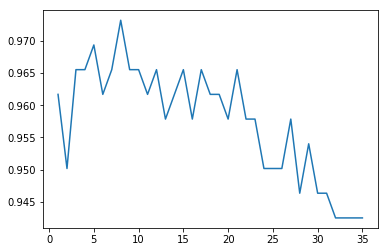

In [659]:
plt.plot(range(1, 36), scores)  

In [660]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))
metrics.confusion_matrix(y_test, y_pred_class)

Test Accuracy score:  0.9731800766283525
Test F1 score:  0.97165991902834


array([[134,   3],
       [  4, 120]])

## AdaBoost

In [661]:
ada_class = AdaBoostClassifier(random_state = 12345)
ada_class.fit(X_train, y_train)
print(ada_class.score(X_train, y_train))
print(ada_class.score(X_test, y_test))
pred = ada_class.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

0.9923371647509579
0.9386973180076629
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       137
           1       0.94      0.94      0.94       124

    accuracy                           0.94       261
   macro avg       0.94      0.94      0.94       261
weighted avg       0.94      0.94      0.94       261



## XGBoost

In [662]:
xgb_class = XGBClassifier(random_state = 12345)
xgb_rf_class = XGBRFClassifier(random_state = 12345)
xgb_class.fit(X_train, y_train)
print(xgb_class.score(X_train, y_train))
print(xgb_class.score(X_test, y_test))
pred = xgb_class.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

1.0
0.9770114942528736
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       137
           1       0.97      0.98      0.98       124

    accuracy                           0.98       261
   macro avg       0.98      0.98      0.98       261
weighted avg       0.98      0.98      0.98       261



In [663]:
xgb_rf_class.fit(X_train, y_train)
print(xgb_rf_class.score(X_train, y_train))
print(xgb_rf_class.score(X_test, y_test))

0.9626436781609196
0.9770114942528736


In [664]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
cm

array([[133,   4],
       [  2, 122]])

In [665]:
pd.DataFrame(cm, columns = ['Predicted R wins', 'Predicted D wins'], 
             index = ['Actual R wins', 'Actual D wins'])

,Predicted R wins,Predicted D wins
Actual R wins,133,4
Actual D wins,2,122


## Model 4: All features minus collinear ones

In [693]:
features_model_2 = [
 'incumbent_L5_races',
 'incumbent_L4_races',
 'incumbent_L3_races',
 'incumbent_L2_races',
#  'rep_L1_wins',
#  'rep_L5_wins',
#  'rep_L4_wins',
#  'rep_L3_wins',
#  'rep_L2_wins',
 'dem_L1_wins',
 'dem_L5_wins',
 'dem_L4_wins',
 'dem_L3_wins',
 'dem_L2_wins',
#  'rep_L1_voteshare',
#  'rep_L5_voteshare',
#  'rep_L4_voteshare',
#  'rep_L3_voteshare',
#  'rep_L2_voteshare',
 'dem_L1_voteshare',
 'dem_L5_voteshare',
 'dem_L4_voteshare',
 'dem_L3_voteshare',
 'dem_L2_voteshare',
 'dem_incumbent_in_race',
 'rep_incumbent_in_race',
#  'mpop_share',
 'fpop_share',
#  'm18_below_share',
#  'f18_below_share',
 '18_below_share',
#  'm18_above_share',
#  'f18_above_share',
 '18_above_share',
#  'm18_29_share',
#  'f18_29_share',
 '18_29_share',
#  'm30_44_share',
#  'f30_44_share',
 '30_44_share',
#  'm45_59_share',
#  'f45_59_share',
 '45_59_share',
#  'm60_74_share',
#  'f60_74_share',
 '60_74_share',
#  'm75_above_share',
#  'f75_above_share',
 '75_above_share',
 'white_share',
 'black_share',
 'asian_share',
 'hispanic_share',
 'otherrace_share',
 # 'native_share',
 # 'nativeinstate_share',
 'nativeoutofstate_share',
 'foreignborn_share',
 'hs_below_share',
 'hs_share',
 'somecollege_share',
 'college_share',
 'graddeg_share',
 'samehouse_share',
 'samecounty_share',
 'samestate_share',
 'diffstate_share',
 'liveabroad_share',
 'ptransport_share',
 'walktowork_share',
 'workathome_share',
 'inschool_share',
 'incollege_share',
 'ingradschool_share',
 'm_college_share',
 'm_graddeg_share',
 'm_phd_share',
 # 'f_college_share',
 'f_graddeg_share',
 'f_phd_share',
 'poverty_share',
 'hhinc_10k_less_share',
 'hhinc_30k_less_share',
 'hhinc_50k_less_share',
 'hhinc_75k_more_share',
 'hhinc_100k_more_share',
 'hhinc_125k_more_share',
 'hhinc_150k_more_share',
 'hhinc_200k_more_share',
 'veteran_share',
 'lfp_share',
 'unemp_rate',
 'armedforce_share',
 'vacanthousing_share',
 'renter_share',
 'mortgage_share',
 # 'l1_mpop_share',
 # 'diff1_mpop_share',
#  'l1_fpop_share',
 'diff1_fpop_share',
 # 'l1_m18_below_share',
 # 'diff1_m18_below_share',
 # 'l1_f18_below_share',
 # 'diff1_f18_below_share',
#  'l1_18_below_share',
 'diff1_18_below_share',
 # 'l1_m18_above_share',
 # 'diff1_m18_above_share',
 # 'l1_f18_above_share',
 # 'diff1_f18_above_share',
#  'l1_18_above_share',
 'diff1_18_above_share',
 # 'l1_m18_29_share',
 # 'diff1_m18_29_share',
 # 'l1_f18_29_share',
 # 'diff1_f18_29_share',
#  'l1_18_29_share',
 'diff1_18_29_share',
 # 'l1_m30_44_share',
 # 'diff1_m30_44_share',
 # 'l1_f30_44_share',
 # 'diff1_f30_44_share',
#  'l1_30_44_share',
 'diff1_30_44_share',
 # 'l1_m45_59_share',
 # 'diff1_m45_59_share',
 # 'l1_f45_59_share',
 # 'diff1_f45_59_share',
#  'l1_45_59_share',
 'diff1_45_59_share',
 # 'l1_m60_74_share',
 # 'diff1_m60_74_share',
 # 'l1_f60_74_share',
 # 'diff1_f60_74_share',
#  'l1_60_74_share',
 'diff1_60_74_share',
 # 'l1_m75_above_share',
 # 'diff1_m75_above_share',
 # 'l1_f75_above_share',
 # 'diff1_f75_above_share',
#  'l1_75_above_share',
 'diff1_75_above_share',
#  'l1_white_share',
 'diff1_white_share',
#  'l1_black_share',
 'diff1_black_share',
#  'l1_asian_share',
 'diff1_asian_share',
#  'l1_hispanic_share',
 'diff1_hispanic_share',
#  'l1_otherrace_share',
 'diff1_otherrace_share',
 # 'l1_native_share',
 # 'diff1_native_share',
 # 'l1_nativeinstate_share',
 # 'diff1_nativeinstate_share',
#  'l1_nativeoutofstate_share',
 'diff1_nativeoutofstate_share',
#  'l1_foreignborn_share',
 'diff1_foreignborn_share',
#  'l1_hs_below_share',
 'diff1_hs_below_share',
#  'l1_hs_share',
 'diff1_hs_share',
#  'l1_somecollege_share',
 'diff1_somecollege_share',
#  'l1_college_share',
 'diff1_college_share',
#  'l1_graddeg_share',
 'diff1_graddeg_share',
#  'l1_samehouse_share',
 'diff1_samehouse_share',
#  'l1_samecounty_share',
 'diff1_samecounty_share',
#  'l1_samestate_share',
 'diff1_samestate_share',
#  'l1_diffstate_share',
 'diff1_diffstate_share',
#  'l1_liveabroad_share',
 'diff1_liveabroad_share',
#  'l1_ptransport_share',
 'diff1_ptransport_share',
#  'l1_walktowork_share',
 'diff1_walktowork_share',
#  'l1_workathome_share',
 'diff1_workathome_share',
#  'l1_inschool_share',
 'diff1_inschool_share',
#  'l1_incollege_share',
 'diff1_incollege_share',
#  'l1_ingradschool_share',
 'diff1_ingradschool_share',
#  'l1_m_college_share',
 'diff1_m_college_share',
#  'l1_m_graddeg_share',
 'diff1_m_graddeg_share',
#  'l1_m_phd_share',
 'diff1_m_phd_share',
 # 'l1_f_college_share',
 # 'diff1_f_college_share',
#  'l1_f_graddeg_share',
 'diff1_f_graddeg_share',
#  'l1_f_phd_share',
 'diff1_f_phd_share',
#  'l1_poverty_share',
 'diff1_poverty_share',
#  'l1_hhinc_10k_less_share',
 'diff1_hhinc_10k_less_share',
#  'l1_hhinc_30k_less_share',
 'diff1_hhinc_30k_less_share',
#  'l1_hhinc_50k_less_share',
 'diff1_hhinc_50k_less_share',
#  'l1_hhinc_75k_more_share',
 'diff1_hhinc_75k_more_share',
#  'l1_hhinc_100k_more_share',
 'diff1_hhinc_100k_more_share',
#  'l1_hhinc_125k_more_share',
 'diff1_hhinc_125k_more_share',
#  'l1_hhinc_150k_more_share',
 'diff1_hhinc_150k_more_share',
#  'l1_hhinc_200k_more_share',
 'diff1_hhinc_200k_more_share',
#  'l1_veteran_share',
 'diff1_veteran_share',
#  'l1_lfp_share',
 'diff1_lfp_share',
#  'l1_unemp_rate',
 'diff1_unemp_rate',
#  'l1_armedforce_share',
 'diff1_armedforce_share',
#  'l1_vacanthousing_share',
 'diff1_vacanthousing_share',
#  'l1_renter_share',
 'diff1_renter_share',
#  'l1_mortgage_share',
 'diff1_mortgage_share',
 'median_household_income_scaled',
 'income_lowest_quintile_scaled',
 'income_second_quintile_scaled',
 'income_third_quintile_scaled',
 'income_fourth_quintile_scaled',
 'income_highest_quintile_scaled',
 'income_top_5_percent_scaled',
 'median_gross_rent_scaled',
 'median_monthly_owner_costs_scaled',
#  'L1_median_household_income_scaled',
 'diff1_median_household_income_scaled',
#  'L1_income_lowest_quintile_scaled',
 'diff1_income_lowest_quintile_scaled',
#  'L1_income_second_quintile_scaled',
 'diff1_income_second_quintile_scaled',
#  'L1_income_third_quintile_scaled',
 'diff1_income_third_quintile_scaled',
#  'L1_income_fourth_quintile_scaled',
 'diff1_income_fourth_quintile_scaled',
#  'L1_income_highest_quintile_scaled',
 'diff1_income_highest_quintile_scaled',
#  'L1_income_top_5_percent_scaled',
 'diff1_income_top_5_percent_scaled',
#  'L1_median_gross_rent_scaled',
 'diff1_median_gross_rent_scaled',
#  'L1_median_monthly_owner_costs_scaled',
 'diff1_median_monthly_owner_costs_scaled',
]

In [694]:
len(features_model_2)

138

#### Random Forest, for Model 2

In [695]:
X_train, X_test, y_train, y_test = district_train_test_split(dataframe=housevotes_df, 
                                                             idx_colname='idx',
                                                             np_seed=12345, 
                                                             tts_seed=12345, 
                                                             test_size=0.2,
                                                             cols_for_stratify=['target', 'dmargin_45_55']
                                                             )

In [696]:
X_train = X_train[features_model_2]
X_test = X_test[features_model_2]
print(X_train.shape)
print(X_test.shape)

rf = RandomForestClassifier(random_state=23, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_class = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))

(1044, 138)
(261, 138)
Test Accuracy score:  0.9655172413793104
Test F1 score:  0.963265306122449


In [697]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[134,   3],
       [  6, 118]])

In [698]:
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_class), columns = ['Predicted R wins', 'Predicted D wins'], 
             index = ['Actual R wins', 'Actual D wins'])

,Predicted R wins,Predicted D wins
Actual R wins,134,3
Actual D wins,6,118


Look at feature importance

In [699]:
feat_importance = pd.DataFrame((zip(X_train.columns, rf.feature_importances_)))
feat_importance.columns = ['feature_name', 'importance']
feat_importance.importance = feat_importance.importance.apply(lambda x: '%.3f' % x) 
feat_importance.sort_values('importance', ascending=False)

,feature_name,importance
4,dem_L1_wins,0.114
9,dem_L1_voteshare,0.080
13,dem_L2_voteshare,0.074
14,dem_incumbent_in_race,0.071
6,dem_L4_wins,0.051
8,dem_L2_wins,0.041
7,dem_L3_wins,0.040
12,dem_L3_voteshare,0.040
15,rep_incumbent_in_race,0.037
10,dem_L5_voteshare,0.032


## Logistic regression

In [649]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))
metrics.confusion_matrix(y_test, y_pred_class)

Test Accuracy score:  0.9616858237547893
Test F1 score:  0.9596774193548389


/Users/ptw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[132,   5],
       [  5, 119]])

## GridSearch

In [472]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 23,
 'verbose': 0,
 'warm_start': False}


In [473]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [200]:
rf = RandomForestClassifier(random_state = 23)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished


In [201]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [203]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 60, 70, 80, 90, 100, 110],
    'max_features': [1,2, 3, 'sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3, 4, 5, 6, 7, 8, 10, 12],
    'n_estimators': [100]
}

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [False],

In [204]:
CV_rfc.best_params_


{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

In [205]:
rfc_pred = CV_rfc.best_estimator_.predict(X_test)
# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, rfc_pred))
# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, rfc_pred))

Test Accuracy score:  0.9616858237547893
Test F1 score:  0.9596774193548389


## KNN

In [619]:
scores = []
for k in range(1, 36):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
#     print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
#     print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))
    scores.append(metrics.accuracy_score(y_test, y_pred_class))

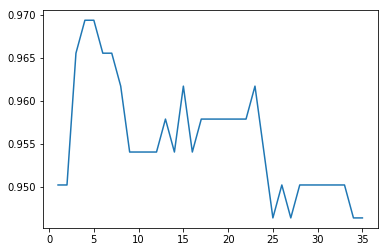

In [620]:
plt.plot(range(1, 36), scores)  # set k=25

In [621]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))
metrics.confusion_matrix(y_test, y_pred_class)

Test Accuracy score:  0.9693486590038314
Test F1 score:  0.9674796747967479


array([[134,   3],
       [  5, 119]])

## AdaBoost

In [626]:
ada_class = AdaBoostClassifier(random_state = 12345)
ada_class.fit(X_train, y_train)
print(ada_class.score(X_train, y_train))
print(ada_class.score(X_test, y_test))
pred = ada_class.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

0.9846743295019157
0.946360153256705
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       137
           1       0.93      0.96      0.94       124

    accuracy                           0.95       261
   macro avg       0.95      0.95      0.95       261
weighted avg       0.95      0.95      0.95       261



## XGBoost

In [624]:
xgb_class = XGBClassifier(random_state = 12345)
xgb_rf_class = XGBRFClassifier(random_state = 12345)
xgb_class.fit(X_train, y_train)
print(xgb_class.score(X_train, y_train))
print(xgb_class.score(X_test, y_test))
pred = xgb_class.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

1.0
0.9846743295019157
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       137
           1       0.98      0.98      0.98       124

    accuracy                           0.98       261
   macro avg       0.98      0.98      0.98       261
weighted avg       0.98      0.98      0.98       261



In [623]:
xgb_rf_class.fit(X_train, y_train)
print(xgb_rf_class.score(X_train, y_train))
print(xgb_rf_class.score(X_test, y_test))

1.0
0.9846743295019157
0.9683908045977011
0.9808429118773946


In [625]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
cm

array([[135,   2],
       [  2, 122]])

In [629]:
pd.DataFrame(cm, columns = ['Predicted R wins', 'Predicted D wins'], 
             index = ['Actual R wins', 'Actual D wins'])

,Predicted R wins,Predicted D wins
Actual R wins,135,2
Actual D wins,2,122


## Merf

In [523]:
def district_train_test_split(dataframe, idx_colname, np_seed, tts_seed, test_size, cols_for_stratify):
    np.random.seed(np_seed)
    population = np.arange(1, 436)
    sample_1_ids = np.random.choice(population, 200, replace=False)
    sample_2_ids = list(set(population) - set(sample_1_ids))
    sample_1 = dataframe[dataframe[idx_colname].isin(sample_1_ids)]
    sample_2 = dataframe[dataframe[idx_colname].isin(sample_2_ids)]
    train_s1, test_s1 = train_test_split(sample_1, 
                                         test_size=test_size, 
                                         random_state=tts_seed, 
                                         stratify=sample_1[cols_for_stratify]
                                        )
    train_s2, test_s2 = train_test_split(sample_2,
                                         test_size=test_size,
                                         random_state=tts_seed, 
                                         stratify=sample_2[cols_for_stratify]
                                        )
    train = pd.concat([train_s1, train_s2], axis=0)
    test = pd.concat([test_s1, test_s2], axis=0)
    X_train = train.drop(['target'], axis=True)
    y_train = train['target']
    X_test = test.drop(['target'], axis=True)
    y_test = test['target']

#     print('Shape for X_train:', X_train.shape)
#     print('Shape for y_train:', y_train.shape)
#     print('Shape for X_test:', X_test.shape)
#     print('Shape for y_test:', y_test.shape)
    
    return X_train, X_test, y_train, y_test


In [524]:
X_train, X_test, y_train, y_test = district_train_test_split(dataframe=housevotes_df, 
                                                             idx_colname='idx',
                                                             np_seed=12345, 
                                                             tts_seed=12345, 
                                                             test_size=0.2,
                                                             cols_for_stratify=['target', 'dmargin_45_55']
                                                             )

In [525]:
X_train.columns

Index(['yr_district_id', 'year_x', 'state', 'district_id_x',
       'winner_voteshare', 'total_dem_vote_share', 'total_rep_vote_share',
       'dL1_winner', 'dL2_winner', 'dL3_winner',
       ...
       'L1_income_top_5_percent_scaled', 'diff1_income_top_5_percent_scaled',
       'L1_median_gross_rent_scaled', 'diff1_median_gross_rent_scaled',
       'L1_median_monthly_owner_costs_scaled',
       'diff1_median_monthly_owner_costs_scaled', 'idx', '2014', '2016',
       '2018'],
      dtype='object', length=281)

In [526]:
X_train = X_train[['dem_L1_wins','year_x','idx']]
X_test = X_test[['dem_L1_wins','year_x','idx']]
print(X_train.shape)
print(X_test.shape)

(1044, 3)
(261, 3)


In [529]:
clusters_train = X_train['idx']
Z_train = X_train['year_x']
print(clusters_train.shape)
print(Z_train.shape)

(1044,)
(1044,)


In [528]:
from merf.utils import MERFDataGenerator
from merf.merf import MERF
mrf = MERF(n_estimators=300, max_iterations=100)
mrf.fit(X_train,Z_train, clusters_train, y_train)

IndexError: tuple index out of range

## Testing (Omer's ideas)

In [ ]:
(housevotes_df.dem_L2_wins - housevotes_df.dem_L1_wins).

In [ ]:
test_flips_df = housevotes_df[(housevotes_df.target - housevotes_df.dem_L1_wins) != 0]  # flips in either direction
test_flips_df.shape

In [ ]:
(housevotes_df.target - housevotes_df.dem_L1_wins).value_counts()

In [ ]:
test_flips_df.groupby(['dem_L1_wins', 'dem_L2_wins']).size()

In [ ]:
housevotes_df.dem_L2_wins.value_counts()

In [ ]:
test_df = pd.concat([X_test.reset_index(drop=True), pd.Series(y_pred_prob[:, 1]), y_test.reset_index(drop=True)], axis=1)
test_df = test_df.rename(columns={0:'predicted_proba'})
test_df.loc[(test_df.swing_district == 1) & (test_df.incumbent_in_race == 0), ['dL1_winner', 
                                                                               'dL1_winner', 
                                                                               'incumbent_L3_races', 
                                                                               'incumbent_in_race', 
#                                                                                'swing_district', 
                                                                               'predicted_proba', 
                                                                               'target']]#.shape

Heatmap to visualize correlations

In [74]:
# housevotes_df[features_model_1].corr()[['target']]

In [75]:
# plt.figure(figsize = (20,16))
# sns.heatmap(housevotes_df[features_model_1].corr(), center=0, annot = True)

Heatmap to visualize correlations

In [140]:
housevotes_df[features_model_2 + ['target']].corr()[['target']][:50]#.shape
housevotes_df[features_model_2 + ['target']].corr()[['target']][50:100]#.shape
housevotes_df[features_model_2 + ['target']].corr()[['target']][100:150]#.shape

,target
l1_m18_below_share,-0.061401
diff1_m18_below_share,-0.050238
l1_f18_below_share,-0.100208
diff1_f18_below_share,-0.039914
l1_18_below_share,-0.084387
diff1_18_below_share,-0.058963
l1_m18_above_share,0.061401
diff1_m18_above_share,0.050238
l1_f18_above_share,0.100208
diff1_f18_above_share,0.039914


## To do:

- Try MERF, logistic, knn
- baseline model: always predict what it was before (using just 1 lag term)
- check all columns are supposed to be there
- dig into exact observations where it changed to 1 in 2018, what is driving the prediction there
- build a model with swing states (the 60) matched on 60 non-swings, try with other estimators too (logistic, SVM, etc.)

Later:
- grid search for hyperparameter tuning
- k-folds cross validataion